#Diamonds Data Analysis

Data Set : https://drive.google.com/file/d/1-mppNtInWcW-3wIgKzcINq7RyVE75sC5/view?usp=sharing

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read Data

In [2]:
data = pd.read_csv('/content/cubic_zirconia.csv')
data.sample(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
11569,11570,0.90,Very Good,G,SI2,63.1,59.0,6.11,6.16,3.87,3353
24035,24036,1.51,Premium,I,VVS2,61.1,60.0,7.36,7.33,4.49,10817
18650,18651,1.04,Premium,E,SI2,61.6,58.0,6.52,6.45,3.99,3914
9219,9220,0.31,Premium,H,VS2,62.7,59.0,4.32,4.29,2.70,628


Diamonds Dataset Analysis and Pre-Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
data.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [7]:
data.dtypes  # Checking the type of the dataset.

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [8]:
data.shape  # Checking the shape of the dataset.

(26967, 11)

In [9]:
data.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


What we can see is, that we have 0 values in the columns x, y and z. This would mean that there are diamonds which have no dimensions. It's a sign of faulty data which is why I am going to eliminate those values

Rows of x,y,z with 0 wrong values

In [10]:
print('Number of rows with x = 0 are {}'.format((data.x==0).sum()))
print('Number of rows with x = 0 are {}'.format((data.y==0).sum()))
print('Number of rows with x = 0 are {}'.format((data.z==0).sum()))

Number of rows with x = 0 are 3
Number of rows with x = 0 are 3
Number of rows with x = 0 are 9


Rows of x,y,z with wrong values set to NaN

In [11]:
data.x = data.x.replace(0,np.NaN)
data.y = data.y.replace(0,np.NaN)
data.z = data.z.replace(0,np.NaN)

print("Number of rows with x = 0 are {}".format((data.x==0).sum()))
print("Number of rows with y = 0 are {}".format((data.y==0).sum()))
print("Number of rows with z = 0 are {}".format((data.z==0).sum()))

Number of rows with x = 0 are 0
Number of rows with y = 0 are 0
Number of rows with z = 0 are 0


In [12]:
#Dropping dimensionless features

data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)

In [13]:
data[['x','y','z']].describe()

,x,y,z
count,26964.000000,26964.000000,26958.000000
mean,5.730491,5.734207,3.539238
std,1.126959,1.164553,0.717838
min,3.730000,3.710000,1.070000
25%,4.710000,4.720000,2.900000
50%,5.690000,5.710000,3.520000
75%,6.550000,6.540000,4.040000
max,10.230000,58.900000,31.800000


In [14]:
#checking for null values 
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               3
y               3
z               9
price           0
dtype: int64

Missing value Treatment

In [15]:
data['depth'].fillna(data['depth'].mean(), inplace=True) # By Mean

Dropping Duplicates

In [16]:
print(f'Before removing duplicates{data.shape}')
data.drop_duplicates(inplace=True)
print(f'After removing duplicates{data.shape}')

Before removing duplicates(26967, 11)
After removing duplicates(26967, 11)


In [17]:
data.duplicated().sum()

0

No Dulpicates Enteries Observed

Drop Unnamed Column

In [18]:
data.drop(['Unnamed: 0'],inplace = True, axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Correlation Table

In [19]:
data.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.034865,0.181685,0.977847,0.942412,0.946805,0.922416
depth,0.034865,1.000000,-0.293965,-0.018424,-0.024398,0.097099,-0.002534
table,0.181685,-0.293965,1.000000,0.197801,0.183860,0.151259,0.126942
x,0.977847,-0.018424,0.197801,1.000000,0.962612,0.961077,0.887478
y,0.942412,-0.024398,0.183860,0.962612,1.000000,0.933100,0.857355
z,0.946805,0.097099,0.151259,0.961077,0.933100,1.000000,0.855920
price,0.922416,-0.002534,0.126942,0.887478,0.857355,0.855920,1.000000


1. Carat and Price are highly corelated with x,y and z
2. But Depth doesn't have much impact, which is derived from x,y and z

Correlation Heat Map

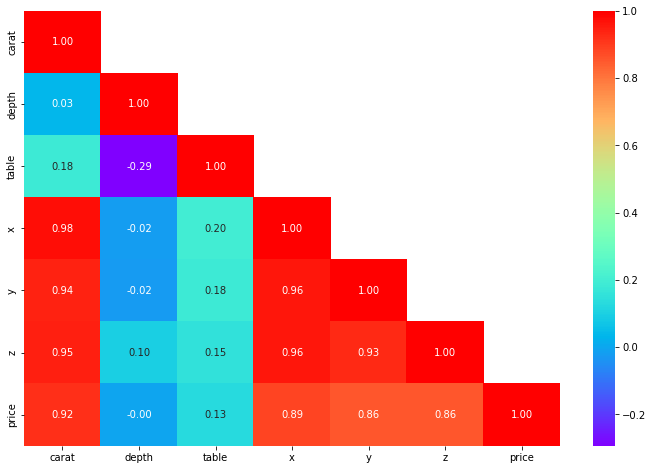

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(data.corr(),+1))
plt.show()

Finding Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


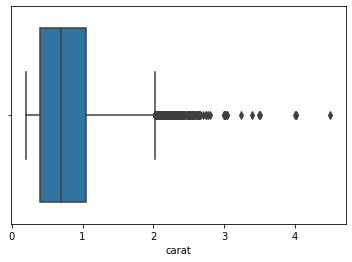

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


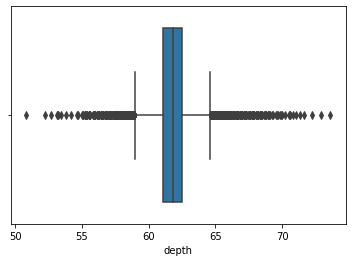

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


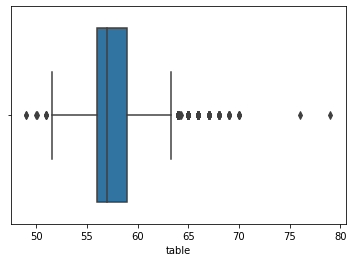

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


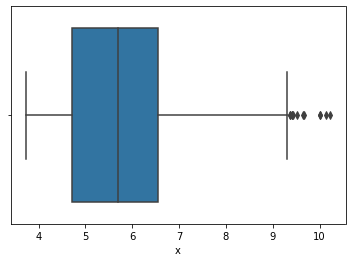

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


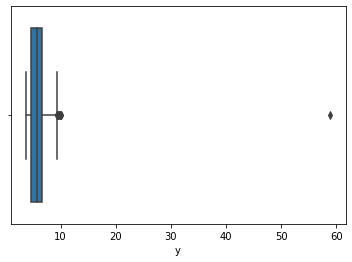

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


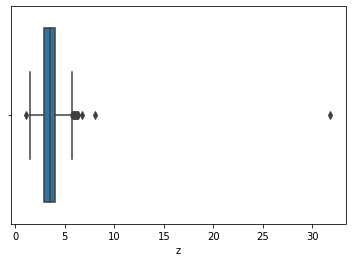

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


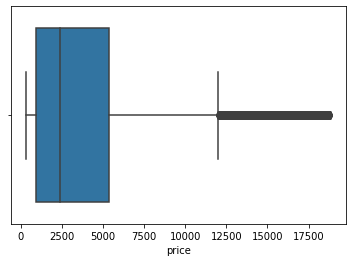

In [21]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.show();

Outlier treatment :

In [22]:

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in data[cols].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


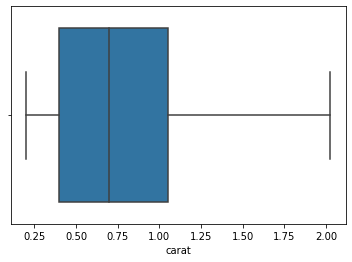

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


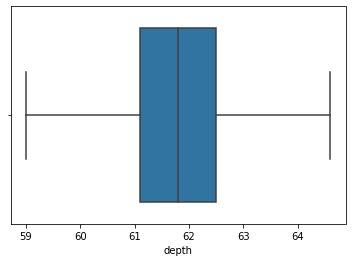

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


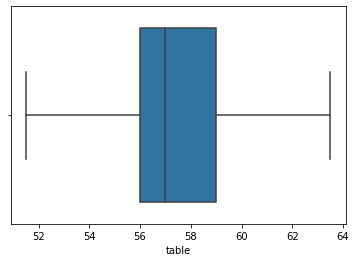

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


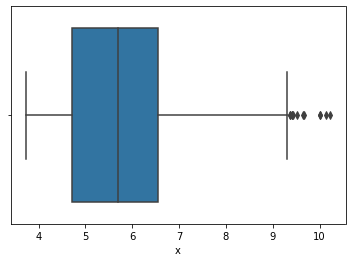

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


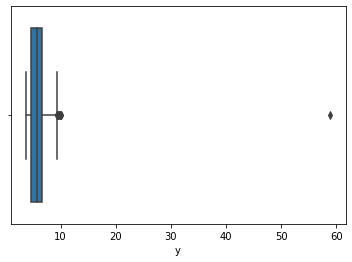

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


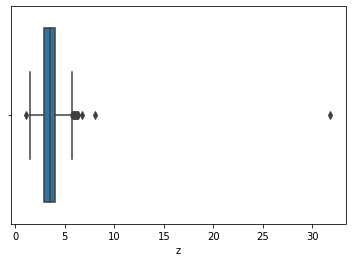

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


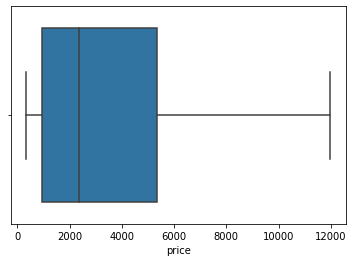

In [24]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(data[i],whis=1.5)
    plt.show();

Univariate Analysis

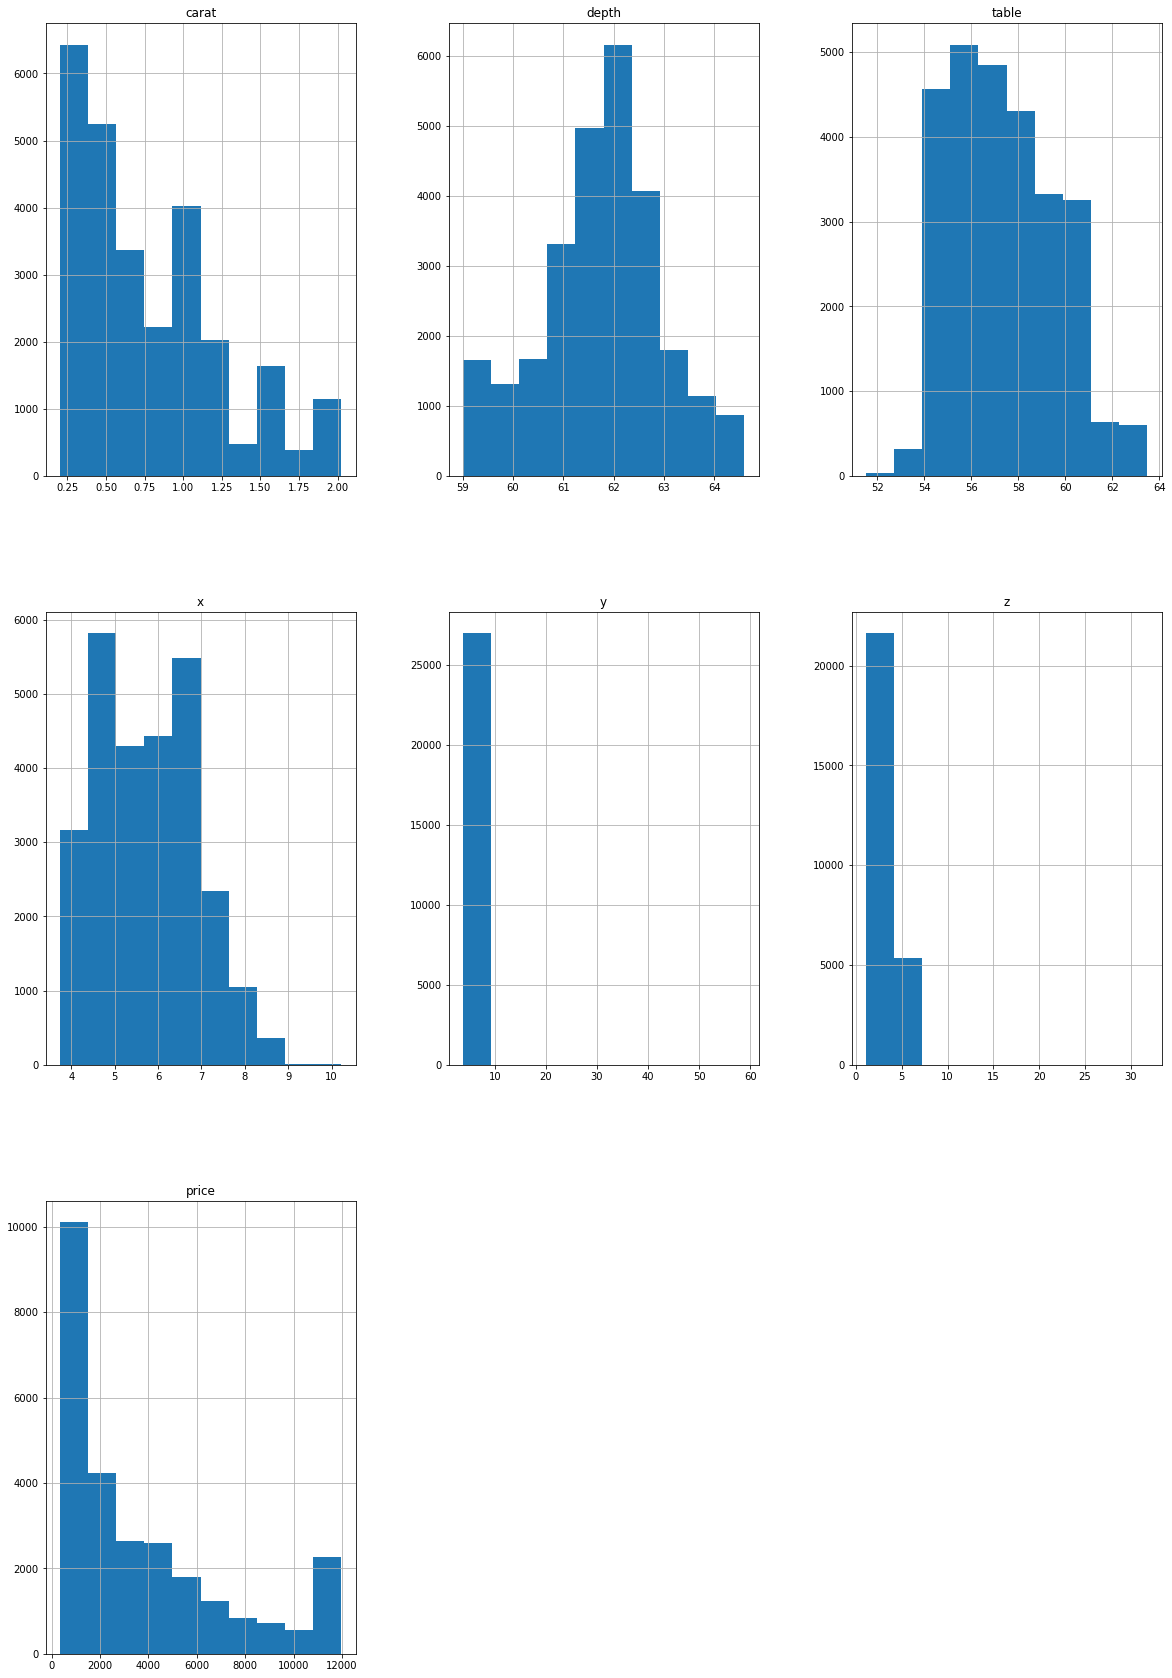

In [25]:
data.hist(figsize=(20,30));

Skewness

In [26]:
data.skew() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    0.917096
depth   -0.191717
table    0.480441
x        0.402567
y        3.877199
z        2.634182
price    1.158126
dtype: float64

There is significant amount of outlier present in some variable. (2) We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed

In [27]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

Bi Variate Analysis

In [28]:
data['cut'].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

In [29]:
data['color'].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [30]:
data['clarity'].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


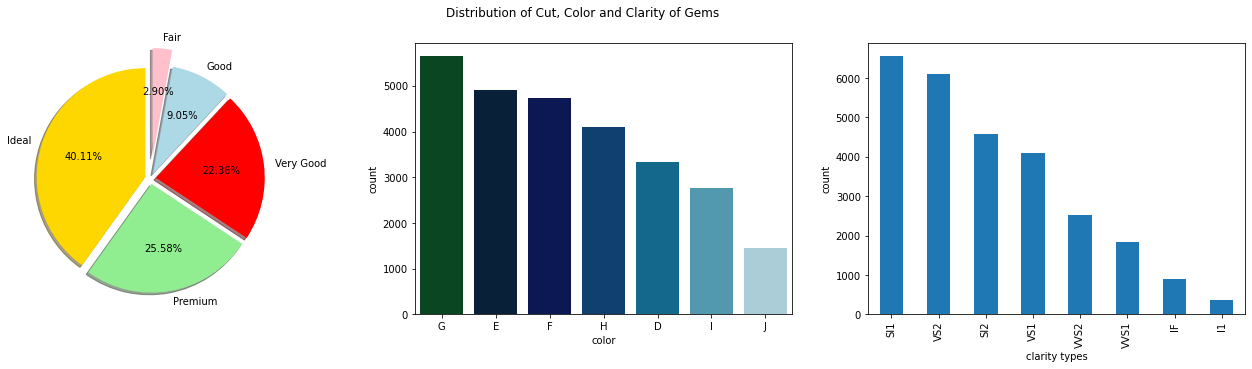

In [31]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(data['cut'].value_counts().values,
        labels=data['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(data['color'], palette='ocean', order=data['color'].value_counts().index)

plt.subplot(133)
data["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

Count of diamonds based on cut

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

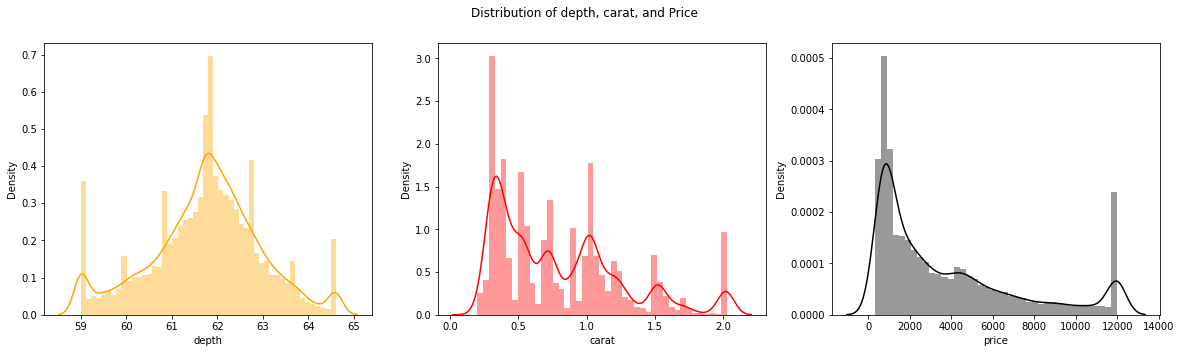

In [32]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(data['depth'], color='orange')

plt.subplot(132)
sns.distplot(data['carat'], color='red')

plt.subplot(133)
sns.distplot(data['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


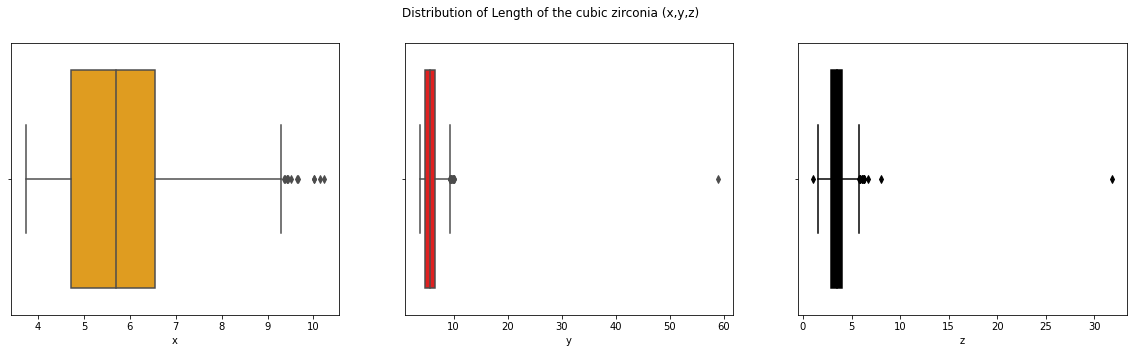

In [33]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(data['x'], color='orange')

plt.subplot(132)
sns.boxplot(data['y'], color='red')

plt.subplot(133)
sns.boxplot(data['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

Orange Box Plot: Outliers for X >10
Red Box Plot: Outliers for Z around 600
Black Box Plot: Outliers for X between 10 and 35
Observed



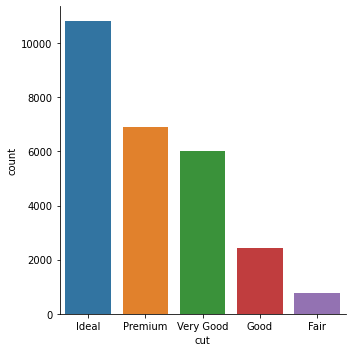

In [34]:
sns.catplot(data=data, x='cut', kind = "count")

Clarity vs Price

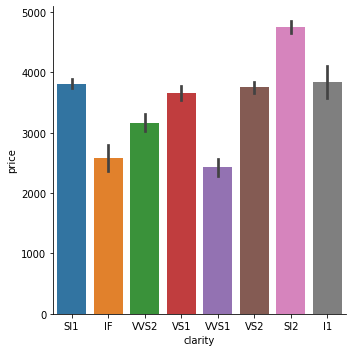

In [35]:
sns.catplot(data=data,x='clarity', y= 'price', kind = 'bar')

Color vs Price

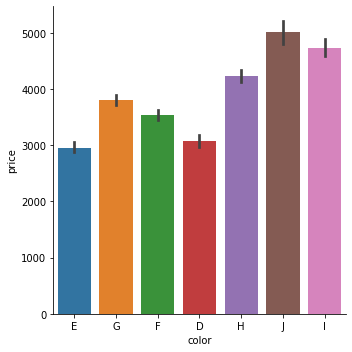

In [36]:
sns.catplot(data=data, x='color', y = 'price', kind = "bar")

Clarity vs Price

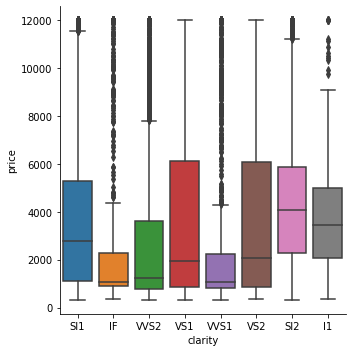

In [37]:
sns.catplot(data=data, x='clarity', y = 'price', kind = "box")

Cut vs Price

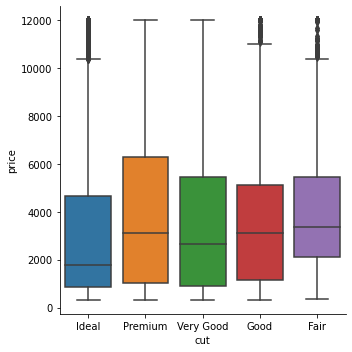

In [38]:
print(sns.catplot(data=data, x='cut', y = 'price', kind = "box"))